In [24]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [5]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [6]:
df = pd.read_excel("AdventureWorks.xlsx")

In [7]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [8]:
df.sample()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
210,2008-10-26,2008-10-31,199,1155,18881,200810264CS786,324.69,980.0,18,0.0,17640.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [9]:
df.shape

(904, 16)

In [10]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [11]:
#Receita total
df["Valor Venda"].sum()

5984606.1426

In [12]:
#Qual o custo total?
df["Custo"] = df["Custo Unitário"] * df["Quantidade"]
df["Custo"]

0      2091.48
1      2091.48
2      2091.48
3      2091.48
4      2091.48
        ...   
899    1985.94
900    1948.14
901    1948.14
902    1985.94
903    1948.14
Name: Custo, Length: 904, dtype: float64

In [13]:
#Custo total
round(df["Custo"].sum(), 1)
# round = arredondar

2486783.0

In [14]:
#Lucro Total
df["Lucro"] = df["Valor Venda"] - df["Custo"]
round(df["Lucro"].sum(),1)

3497823.1

In [100]:
#Tempo de entrega
df["Tempo de entrega"] = df["Data Envio"] - df["Data Venda"]
df["Tempo de entrega"]

0     20 days
1      5 days
2      6 days
3      6 days
4      7 days
        ...  
899   13 days
900   11 days
901    4 days
902    4 days
903    4 days
Name: Tempo de entrega, Length: 904, dtype: timedelta64[ns]

Média de entrega de cada marca

In [119]:
df["Tempo de entrega"] = (df["Data Envio"] - df["Data Venda"]).dt.days


In [123]:
df.groupby("Marca")["Tempo de entrega"].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo de entrega, dtype: float64

In [124]:
df["Tempo de entrega"].dtypes

dtype('int64')

Saber valores vazios

In [17]:
df.isnull().sum()

Data Venda          0
Data Envio          0
ID Loja             0
ID Produto          0
ID Cliente          0
No. Venda           0
Custo Unitário      0
Preço Unitário      0
Quantidade          0
Valor Desconto      0
Valor Venda         0
Produto             0
Fabricante          0
Marca               0
Classe              0
Cor                 0
Custo               0
Lucro               0
Tempo de entrega    0
dtype: int64

Lucro por ano e por marca

In [18]:
#Lucros por ano em cada marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [19]:
#Tirar notação científica
pd.options.display.float_format = '{:20,.2f}'.format

In [20]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()
lucro_ano

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [21]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [22]:
#Qual o total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

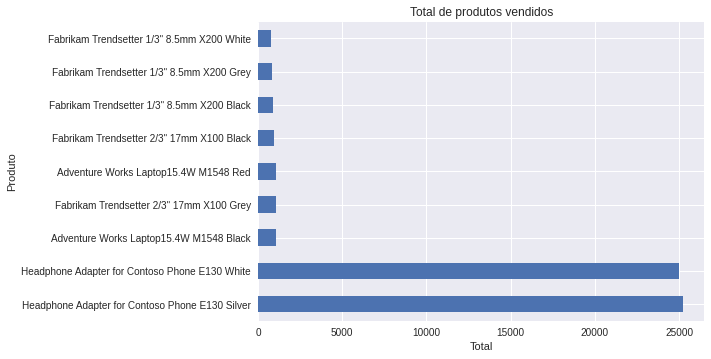

In [38]:
#Grafico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False).plot.barh()
plt.xlabel("Total")
plt.ylabel("Produto")
plt.title("Total de produtos vendidos");

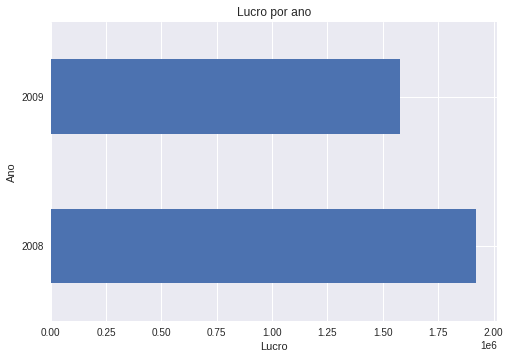

In [42]:
df.groupby([df["Data Venda"].dt.year])["Lucro"].sum().plot.barh(title = "Lucro por ano")
plt.xlabel("Lucro")
plt.ylabel("Ano");

In [49]:
#Retornar vendas apenas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de entrega
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


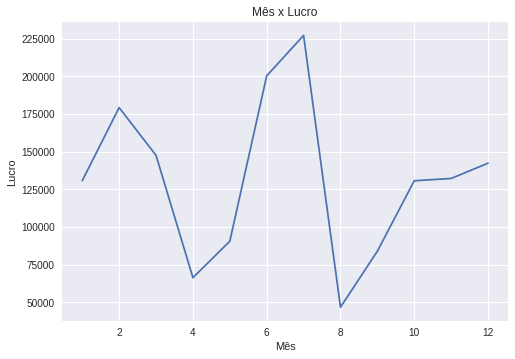

In [56]:
#Relação de mês e lucro
df_2009.groupby(df["Data Venda"].dt.month)["Lucro"].sum().plot(title="Mês x Lucro")
plt.ylabel("Lucro")
plt.xlabel("Mês");

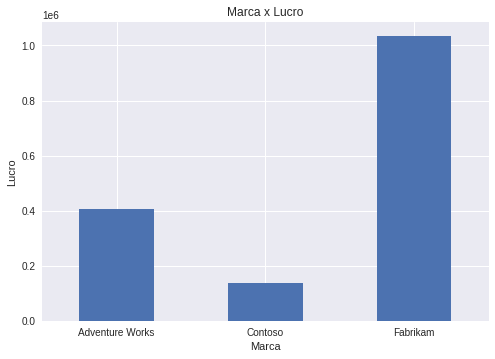

In [63]:
#Marca e Lucro
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Marca x Lucro")
plt.ylabel("Lucro")
plt.xlabel("Marca")
plt.xticks(rotation = 'horizontal'); #girar a legenda do eixo 'x'

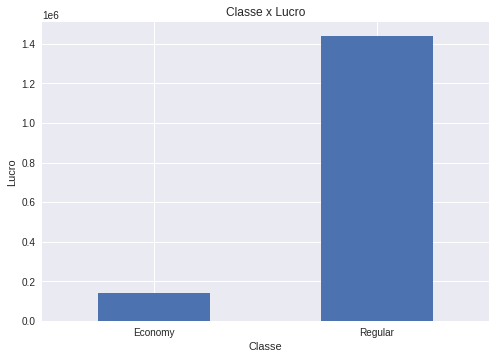

In [68]:
#Classe x Lucro
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Classe x Lucro")
plt.ylabel("Lucro")
plt.xlabel("Classe");
plt.xticks(rotation = "horizontal");

**Analises estatísticas**

In [125]:
df["Tempo de entrega"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo de entrega, dtype: float64

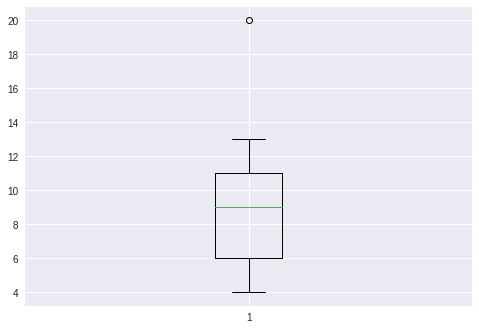

In [126]:
#grafico boxplot
plt.boxplot(df["Tempo de entrega"]);

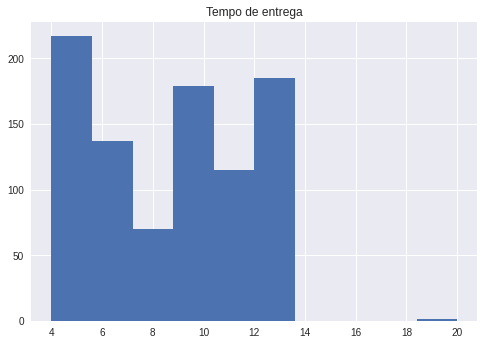

In [129]:
#Histograma
plt.hist(df["Tempo de entrega"])
plt.title("Tempo de entrega");

In [130]:
#Tempo de envio minimo
df["Tempo de entrega"].min()

4

In [131]:
#Tempo de entrega máximo
df["Tempo de entrega"].max()

20

In [135]:
#Linha com tempo de entrega igual a 20
df[df["Tempo de entrega"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de entrega
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [136]:
df.to_csv("df_vendas.csv", index = False)